# Zero Shot Classification of Customers Reviews of a Pizza Outlet using Hugging Face Library

In [1]:
# Importing necessary libraries

import tensorflow as tf # End-to-end open source platform for machine learning, required to run Transformer library
from transformers import pipeline # Transformers provides thousands of pretrained models to perform tasks on texts
import pandas as pd
from tqdm import tqdm # create progress bars and estimate TTC (Time To Completion) for functions and loops

C:\Users\jeffr\anaconda3\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [2]:
# Getting classifier from transformers pipeline

classifier = pipeline("zero-shot-classification")

Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BartForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
#Importing the dataset containing 600 reviews of a pizza outlet
df1 = pd.read_csv("NLP_Reviews.csv")
df1.head()

,Id,ProductId,UserId,Outlet,Age Group,Gender,Date,Data Source,Text,Rating,Dominant Topic,Type
0,5075,B005H3BYHI,A2JZE14RJAITQ8,"Ipoh, Perak",20-29,M,1/3/2021,Grab Food Review,A great touch.,5,Customer Service,POSITIVE
1,5213,B000G1X456,AJDDWX8N8SZIB,"Kampar, Perak",30-39,F,1/3/2021,Tweets,Service was very prompt.,5,Customer Service,POSITIVE
2,5285,B004K051VE,A1V7DY6K5M5G4A,"Kajang, Selangor",30-39,M,1/3/2021,Food Panda Review,Waitress was a little slow in service.,1,Customer Service,NEGATIVE
3,5423,B00622CYVS,A17ASMX6QMO6XY,"Klang, Selangor",40-49,F,1/3/2021,Website Reviews,Service is also cute.,5,Customer Service,POSITIVE
4,5495,B001VNEC68,A1MT4I8L17RY6V,"Subang Jaya, Selangor",30-39,M,1/3/2021,Tweets,So they performed.,5,Delivery,POSITIVE


In [4]:
def zfclassifier(text) :
  hypothesis_template = "This belongs in the {} category."
  candidate_labels = ["Customer Service", "Food Quality", "Price", "Delivery"] # Custom Labels
  categories = classifier(text, candidate_labels ,hypothesis_template=hypothesis_template)
  category = categories['labels'][0]
  #print ('This is from the {} aisle'.format(category))
  return category

In [5]:
tqdm.pandas()
df1['category'] = df1['Text'].progress_apply(lambda x: zfclassifier(x))

100%|██████████████████████████████████████████████████████████████████████████████| 1626/1626 [18:26<00:00,  1.47it/s]


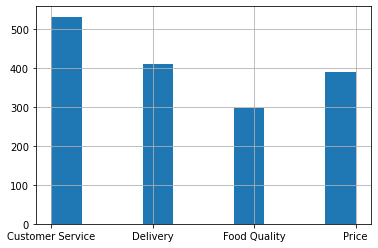

In [6]:
import matplotlib.pyplot as plt
df1['category'].hist()